In [ ]:
# Construct the best model based on the parameters I have found.

# Hyperparameters:
# optimizer = Adam
# learnng rate = 0.00145
# dropout 1 = 0.288662535902546
# dropout 2 = 0.3376263809413643

# Again, I used the Cyclical Learning Rates to build the best model.
# Cyclical Learning Rates (CLR) has the following advantages:
# CLR allows the model to be trained on higher learning rates and converge faster;
# During the middle of learning when learning rate is higher, the learning rate
# works as regularisation method and keep network from overfitting.
# This helps the network to avoid steep areas of loss and land better flatter minima.

# This website introduces this method: 
# https://www.jeremyjordan.me/nn-learning-rate/

# The paper 'Cyclical Learning Rates for Training Neural Networks', Leslie Smith 
# first proposes a cyclical learning rate schedule 
# https://arxiv.org/abs/1506.01186 




# How much better is it than the worst and average models?

# Most optimizers in neural network will achieve the same global optimum 
# if I choose the correct learning rate.
# The fastest optimizer that can achieve the global optimum with the shortest time
# is the best optimizer.

# As is shown in the loss function graph at the end of this file,
# The loss function of test set reaches the global minimum after just 4 epochs.
# The time is shorter. (15.12s)
# Accuracy rate is 96.50%
# And achieve a smaller baseline error (3.50%)

# The avaerage model achieves 93% accuracy after 10 epochs. This model is faster and
# has lower baseline error.




# Result on the test set
# No. The performance on the test set is not representative for the performance 
# one would expect on a previously unseen data set.

# Even when they are drawn from the same distribution, datasets with different sizes
# have different optimal hyperparameters (such as learning rates) in network.
# The performace of a previously unseen data set depends on the optimizers one choose
# as well the size of the data set. 


In [37]:
import numpy as np
#from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
tf.set_random_seed(2)

import numpy as np
tmp = np.load('mnist.npz')
X = tmp['X']
y = tmp['y']
X, y = X[:1000], y[:1000]
X = X.reshape(X.shape[0], 28, 28, 1)

# Normalize
X = X / 255.
# number of unique classes
num_classes = len(np.unique(y))

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

num_tot = y.shape[0]
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

# Print out a few rows of y.
print('Rows of y', y[0:5] )
# Print out a few rows of y_oh.
print('Rows of y_oh after np.zeros transformation ', y_oh[0:5] )

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1

Rows of y [5 0 4 1 9]
Rows of y_oh after np.zeros transformation  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from keras.optimizers import Adagrad
import tensorflow
from keras.callbacks import *
from clr_callback import *
import timeit
%matplotlib inline
import matplotlib.pyplot as plt

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.288662535902546))
model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3376263809413643))
model.add(Dense(10, activation='softmax'))


In [39]:
# The optimal learning rate range for Adam is [0.0010, 0.0015]
# I set this range using cyclical learing rate policy

clr_triangular = CyclicLR(base_lr=0.0010, max_lr=0.0015,
                                step_size=100.,mode = 'triangular')

# Compile the model
model.compile(optimizer = adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
startTime = timeit.default_timer()
history = model.fit(X_train, y_oh_train, validation_data=(X_test, y_oh_test) , batch_size=32, epochs=20, callbacks=[clr_triangular], verbose=2)
elapsedTime = timeit.default_timer() - startTime
print("Time taken for the Network to train : ",elapsedTime)

# Final evaluation of the model
scores = model.evaluate(X_test, y_oh_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 800 samples, validate on 200 samples
Epoch 1/20
 - 1s - loss: 1.6497 - acc: 0.4313 - val_loss: 0.7929 - val_acc: 0.8150
Epoch 2/20
 - 1s - loss: 0.5599 - acc: 0.8250 - val_loss: 0.3417 - val_acc: 0.8700
Epoch 3/20
 - 1s - loss: 0.3212 - acc: 0.8950 - val_loss: 0.2601 - val_acc: 0.9300
Epoch 4/20
 - 1s - loss: 0.2729 - acc: 0.9150 - val_loss: 0.2408 - val_acc: 0.9300
Epoch 5/20
 - 1s - loss: 0.1667 - acc: 0.9525 - val_loss: 0.2156 - val_acc: 0.9450
Epoch 6/20
 - 1s - loss: 0.1225 - acc: 0.9575 - val_loss: 0.1816 - val_acc: 0.9550
Epoch 7/20
 - 1s - loss: 0.0820 - acc: 0.9775 - val_loss: 0.1860 - val_acc: 0.9600
Epoch 8/20
 - 1s - loss: 0.1209 - acc: 0.9563 - val_loss: 0.1761 - val_acc: 0.9500
Epoch 9/20
 - 1s - loss: 0.0908 - acc: 0.9713 - val_loss: 0.1761 - val_acc: 0.9600
Epoch 10/20
 - 1s - loss: 0.0780 - acc: 0.9775 - val_loss: 0.1764 - val_acc: 0.9550
Epoch 11/20
 - 1s - loss: 0.0462 - acc: 0.9875 - val_loss: 0.1772 - val_acc: 0.9500
Epoch 12/20
 - 1s - loss: 0.0659 - acc:

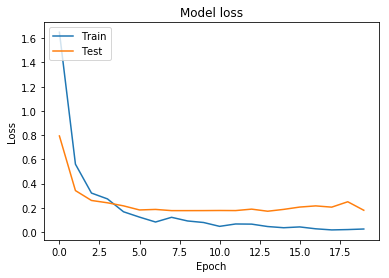

In [41]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()